[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **CAP-340 Problemas Inversos**
## **Esta atividade trata da identificação da condição inicial no problema de condução de calor em uma barra metálica usando um algoritmo genético (AG), em que para formulação do problema inverso, o problema é tratado como um problema de otimização**

**Docente:** *Prof. Dr. Haroldo Fraga de Campos Velho*

**Discente:** *Lourenço José Cavalcante Neto*

---


<img src="https://github.com/lourencocavalcante/CAP-340-Problemas-Inversos/blob/main/Exerc_parte1.PNG?raw=true" width = 800 align="center">
<img src="https://github.com/lourencocavalcante/CAP-340-Problemas-Inversos/blob/main/Exerc_parte2.PNG?raw=true" width = 800 align="center">

### O objetivo é calcular a evolução da temperatura ao longo da barra e compará-la com medições obtidas em sensores ao longo da barra. As medições são obtidas adicionando ruído uniforme às temperaturas simuladas

## 1. Resolver o problema direto da equação do calor

Para resolver este item, o código abaixo código implementa a solução do problema direto da equação do calor em uma barra de metal, utilizando o método de diferenças finitas. A equação diferencial parcial descrita modela a evolução temporal da temperatura ao longo da barra, considerando difusividade térmica constante e extremidades isoladas.

## Cálculo do ***T_mod*** (***Temperatura simulada***), para poder se ter a **T_obs** (***Temperatura observada***) usando a condição inicial:

### ***f(x) = sin(pi * x)***

In [121]:
#Bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do problema
Lx = 1.0         # Comprimento da barra
alpha = 0.01     # Difusividade térmica
dx = 0.1         # Passo espacial
dt = 1e-4        # Passo temporal
tau = 0.01       # Tempo total da simulação
nx = int(Lx / dx) + 1  # Número de pontos espaciais
nt = int(tau / dt)     # Número de passos de tempo
r = alpha * dt / dx**2  # Número de Courant

# Inicialização das temperaturas
x = np.linspace(0, Lx, nx)  # Posições espaciais
T = np.zeros(nx)  # Temperatura inicial
T_new = np.zeros(nx)  # Nova temperatura

# Condição inicial: f(x) = sin(pi * x)
T[:] = np.sin(np.pi * x)

# Diferenças finitas explícitas para resolver o problema
for n in range(0, nt):
    for i in range(1, nx - 1):  # Ignora as extremidades
        T_new[i] = T[i] + r * (T[i - 1] - 2 * T[i] + T[i + 1])

    # Condições de contorno (fixas)
    T_new[0] = 0  # Temperatura na extremidade esquerda fixada
    T_new[-1] = 0  # Temperatura na extremidade direita fixada

    # Atualiza o valor de T para o próximo passo de tempo
    T[:] = T_new[:]

# Agora, percorrendo todas as posições x para imprimir T_mod
for i, pos in enumerate(x):
    print(f'Temperatura simulada T_mod na posição x = {pos:.1f} é: {T[i]:.4f}')


Temperatura simulada T_mod na posição x = 0.0 é: 0.0000
Temperatura simulada T_mod na posição x = 0.1 é: 0.3087
Temperatura simulada T_mod na posição x = 0.2 é: 0.5872
Temperatura simulada T_mod na posição x = 0.3 é: 0.8082
Temperatura simulada T_mod na posição x = 0.4 é: 0.9501
Temperatura simulada T_mod na posição x = 0.5 é: 0.9990
Temperatura simulada T_mod na posição x = 0.6 é: 0.9501
Temperatura simulada T_mod na posição x = 0.7 é: 0.8082
Temperatura simulada T_mod na posição x = 0.8 é: 0.5872
Temperatura simulada T_mod na posição x = 0.9 é: 0.3087
Temperatura simulada T_mod na posição x = 1.0 é: 0.0000


In [122]:
# Parâmetros físicos do problema
alpha = 0.01  # Difusividade térmica
Lx = 1.0      # Comprimento da barra
dx = 0.1      # Passo espacial
tau = 0.01    # Tempo total da simulação


# Aqui criamos um array numérico chamado x que representa os pontos
# igualmente espaçados ao longo da barra de comprimento Lx
x = np.linspace(0, Lx, int(Lx / dx) + 1)

print(f'Quantidade de pontos definidos na barra:{len(x)}')

# Condição inicial foi definda: f(x) = sin(pi * x)
initial_condition = np.sin(np.pi * x)

print(f'\nCondição inicial:{initial_condition}')

Quantidade de pontos definidos na barra:11

Condição inicial:[0.00000000e+00 3.09016994e-01 5.87785252e-01 8.09016994e-01
 9.51056516e-01 1.00000000e+00 9.51056516e-01 8.09016994e-01
 5.87785252e-01 3.09016994e-01 1.22464680e-16]


In [123]:
# Função para resolver a equação do calor usando diferenças finitas explícitas
def solve_heat_equation(f):
    """
    Esta função serve para resolver numericamente a equação do calor ao longo do tempo.
    Retorna a temperatura final T no tempo t = tau.
    """
    nx = len(f)                # Número de pontos espaciais
    dx = Lx / (nx - 1)         # Reajuste do passo espacial
    dt = 0.01  #1e-4           # Passo temporal para estabilidade
    nt = int(tau / dt)         # Número de passos no tempo
    r = alpha * dt / dx**2     # Número de Courant

    # Inicialização das temperaturas
    T = np.zeros((nt, nx))     # Matriz para armazenar as temperaturas no tempo
    T[0, :] = f                # Define a condição inicial


    # Método explícito para atualiza a temperatura no tempo
    for n in range(0, nt - 1):
        T[n + 1, 1:-1] = T[n, 1:-1] + r * (T[n, :-2] - 2 * T[n, 1:-1] + T[n, 2:])

    return T[-1, :]  # Retorna T final no tempo tau


# Solução do problema direto
final_temperature = solve_heat_equation(initial_condition)


print("x       T(x)")
print("-" * 20)
for xi, Ti in zip(x, final_temperature):
    print(f"{xi:.4f}  {Ti:.4f}")



x       T(x)
--------------------
0.0000  0.0000
0.1000  0.3090
0.2000  0.5878
0.3000  0.8090
0.4000  0.9511
0.5000  1.0000
0.6000  0.9511
0.7000  0.8090
0.8000  0.5878
0.9000  0.3090
1.0000  0.0000


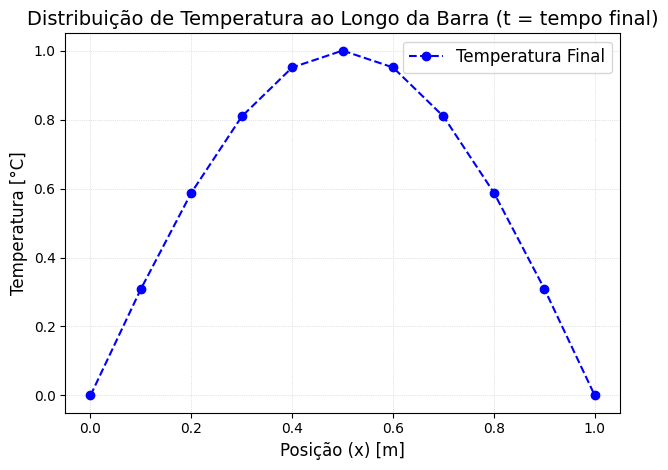

In [124]:
# Gráfico com estilo científico
# plt.style.use("seaborn-muted")  # Escolha de estilo opcional

plt.plot(x, final_temperature, color="blue", linestyle="--", marker="o", label="Temperatura Final")
plt.xlabel("Posição (x) [m]", fontsize=12)  # Rótulo do eixo X, unidades de metros
plt.ylabel("Temperatura [°C]", fontsize=12)  # Rótulo do eixo Y, unidades de Celsius
plt.title("Distribuição de Temperatura ao Longo da Barra (t = tempo final)", fontsize=14)
plt.grid(True, linestyle=":", linewidth=0.5, alpha=0.7)  # Grid sutil para maior clareza
plt.legend(loc="best", fontsize=12)  # Legenda com fonte de tamanho adequado
plt.tight_layout()  # Ajuste automático do layout para evitar sobreposição

# Exibição do gráfico
plt.show()

# Salvamento do gráfico
# plt.savefig("distribuicao_temperatura.png", dpi=300)


### Vamos verificar as condições de contorno

Após obtermos a solução do problema direto, vamos realizar a verificação das condições de contorno, dadas por:

In [125]:
# Verificação das condições de contorno
def check_conditions(T_final, dx):
    """
    Verifica se as condições de contorno
    são satisfeitas nas extremidades da barra.
    """
    left_derivative = (T_final[1] - T_final[0]) / dx  # Derivada à esquerda (x=0)
    right_derivative = (T_final[-1] - T_final[-2]) / dx  # Derivada à direita (x=Lx)


    print(f"\nDerivada na extremidade esquerda (x=0): {left_derivative:.5f}")
    print(f"Derivada na extremidade direita (x=Lx): {right_derivative:.5f}")

    # Retornando os valores para análises adicionais
    return left_derivative, right_derivative

# Verificar após a solução do problema direto
left_d, right_d = check_conditions(final_temperature, dx)


Derivada na extremidade esquerda (x=0): 3.09017
Derivada na extremidade direita (x=Lx): -3.09017



* Nas condições implementadas, as extremidades x=0 e x=Lx **não podem trocar calor** com o ambiente externo.
* Isso significa que a temperatura em T(0) e T(Lx) é ajustada para ser **igual ao ponto vizinho mais próximo**.
* Essa condição força os valores em x=0 e x=Lx a se **equalizarem** ao longo do tempo..


## 2. Construir o conjunto de soluções candidatas (200)

In [126]:
population_size = 200  # Número de indivíduos na população

def initialize_population(size, length):
    """
    Gera uma população inicial de soluções candidatas aleatórias no intervalo [-1, 1].
    """
    return [np.random.uniform(-1, 1, length) for _ in range(size)]

# Teste da função: Geração da população inicial
length = len(x)  # Número de pontos na barra
population = initialize_population(population_size, length)

# Visualizar as primeiras 5 soluções candidatas
print("Primeiras 5 soluções candidatas, das 200:")
for i in range(5):
    print(population[i])


Primeiras 5 soluções candidatas, das 200:
[-0.33015921  0.51643498  0.1741952   0.1704017  -0.94618263 -0.86848132
 -0.96476444  0.4574154  -0.1431138   0.85931638 -0.68080134]
[ 9.61582368e-01 -9.05281446e-03  2.56643098e-04 -4.53931125e-01
  4.62567277e-02 -1.14770258e-01  6.58741102e-01  8.97969541e-01
  1.75076293e-01 -7.69614741e-01  2.42594892e-01]
[-0.13903481 -0.91471892 -0.34046951  0.38876602 -0.15502889  0.43477106
  0.59548232  0.82953142 -0.0770527   0.75801818  0.93753684]
[-0.52412843 -0.61050888 -0.73668662  0.12607994  0.31275984 -0.80482228
  0.74483395 -0.64864815 -0.98309406 -0.24185654  0.2172785 ]
[-0.18706074  0.57404739  0.58457615 -0.01266268  0.34036549 -0.00531251
  0.11951156 -0.58413204 -0.91492877 -0.69522825 -0.72696678]


## 3. Implementar o elitismo no Algoritmo Genético

In [127]:
elite_fraction = 0.3  # Proporção de elitismo (30%)
elite_size = int(elite_fraction * population_size)

def preserve_elite(population, fitness, elite_fraction):
    """
    Seleciona os 30% melhores indivíduos da população (estratégia elitista).
    """
    elite_size = int(elite_fraction * len(population))
    sorted_indices = np.argsort(fitness)
    return [population[i] for i in sorted_indices[:elite_size]]

# Teste da função: preservar a elite
fitness = np.random.rand(population_size)  # Simula valores aleatórios de fitness
elite = preserve_elite(population, fitness, elite_fraction)

print(f"Selecionados {len(elite)} melhores indivíduos da elite. Vamos listar os 5 primeiros:\n")
print(elite[:5])


Selecionados 60 melhores indivíduos da elite. Vamos listar os 5 primeiros:

[array([ 0.10443671, -0.63679727, -0.2787851 ,  0.49346445,  0.78298059,
        0.6195119 , -0.96340606, -0.12733428,  0.61322346,  0.87505279,
       -0.0318626 ]), array([-0.29175684, -0.18415866,  0.38567451,  0.09180586, -0.4553251 ,
       -0.89004254,  0.21796951,  0.96845074, -0.91723352,  0.65872487,
       -0.1681182 ]), array([ 0.03446539,  0.41597509, -0.19457013, -0.66333051,  0.50888602,
        0.55154914,  0.42781233,  0.59234734, -0.69872638,  0.55924065,
       -0.81539104]), array([-0.77158659, -0.99610704, -0.5608768 , -0.30818033, -0.88002709,
        0.68261123,  0.6457406 ,  0.74278621,  0.14217348,  0.52339293,
       -0.07329821]), array([-0.52412843, -0.61050888, -0.73668662,  0.12607994,  0.31275984,
       -0.80482228,  0.74483395, -0.64864815, -0.98309406, -0.24185654,
        0.2172785 ])]


## 4. Aplicar seleção, cruzamento e mutação

In [128]:
# Função de seleção via torneio
def select_parents(population, fitness):
    """
    Seleção via torneio: escolhe o melhor entre dois indivíduos aleatórios.
    """
    # Sorteia aleatoriamente dois índices distintos da população
    idx1, idx2 = np.random.choice(len(population), size=2, replace=False)

    # Compara os valores de fitness dos dois indivíduos sorteados
    # Retorna o indivíduo com menor valor de fitness (o melhor indivíduo no torneio)
    return population[idx1] if fitness[idx1] < fitness[idx2] else population[idx2]

# Função de cruzamento em ponto único
def crossover(parent1, parent2):
    """
    Cruzamento em um ponto aleatório para gerar um filho.
    """
    # Seleciona um ponto de corte aleatório no intervalo [1, tamanho do cromossomo - 1]
    point = np.random.randint(1, len(parent1) - 1)

    # Gera o filho combinando partes dos dois pais:
    # Primeira parte do pai1 até o ponto de corte, seguida pela segunda parte do pai2
    return np.concatenate((parent1[:point], parent2[point:]))

# Função de mutação
def mutate(individual, rate):
    """
    Aplica mutação ao indivíduo com uma taxa específica.
    """
    # Percorre cada "gene" (elemento) do vetor individual
    for i in range(len(individual)):
        # Com probabilidade igual a 'rate', realiza mutação neste gene
        if np.random.rand() < rate:
            # Adiciona uma variação aleatória entre -0.1 e 0.1 ao valor do gene
            individual[i] += np.random.uniform(-0.1, 0.1)
    # Retorna o indivíduo após a aplicação das possíveis mutações
    return individual

# Teste de seleção, cruzamento e mutação

# Seleciona dois indivíduos da elite (melhores soluções encontradas)
parent1 = elite[0]  # O melhor indivíduo (elite)
parent2 = elite[1]  # O segundo melhor indivíduo (elite)

# Realiza cruzamento entre os dois pais para gerar um filho
child = crossover(parent1, parent2)

# Aplica mutação ao filho com uma taxa de 5%
mutated_child = mutate(child, rate=0.05)

# Exibe os resultados das operações realizadas
print("Pai 1:\n", parent1, "\n")                 # Exibe o primeiro pai
print("Pai 2:\n", parent2, "\n")                 # Exibe o segundo pai
print("Filho gerado (crossover):\n", child, "\n") # Mostra o filho antes da mutação
print("Filho após mutação:\n", mutated_child, "\n") # Mostra o filho após a mutação


Pai 1:
 [ 0.10443671 -0.63679727 -0.2787851   0.49346445  0.78298059  0.6195119
 -0.96340606 -0.12733428  0.61322346  0.87505279 -0.0318626 ] 

Pai 2:
 [-0.29175684 -0.18415866  0.38567451  0.09180586 -0.4553251  -0.89004254
  0.21796951  0.96845074 -0.91723352  0.65872487 -0.1681182 ] 

Filho gerado (crossover):
 [ 0.10443671 -0.63679727 -0.2787851   0.49346445  0.78298059 -0.89004254
  0.21796951  0.96845074 -0.91723352  0.56631367 -0.1681182 ] 

Filho após mutação:
 [ 0.10443671 -0.63679727 -0.2787851   0.49346445  0.78298059 -0.89004254
  0.21796951  0.96845074 -0.91723352  0.56631367 -0.1681182 ] 



## Resultado Final: Aqui juntaremos todos os passos para o Algoritmo Genético (AG)

In [129]:


# Parâmetros gerais
population_size = 200         # Tamanho da população inicial
generations = 100             # Número máximo de gerações
elite_fraction = 0.3          # Proporção da população preservada como elite
initial_mutation_rate = 0.05  # Taxa inicial de mutação
mutation_decay = 0.99         # Decaimento da mutação
convergence_threshold = 0.000001  # Critério de parada baseado na convergência
beta = 0.005                  # Parâmetro de regularização

# Importando as funções que já definimos anteriormente
def objective_function(f, T_obs, positions):
    T_mod = solve_heat_equation(f)
    misfit = np.sum((T_obs - T_mod)**2)  # Erro quadrático
    regularization = beta * np.sum(f**2)
    return misfit + regularization

def select_parents(population, fitness):
    idx1, idx2 = np.random.choice(len(population), size=2, replace=False)
    return population[idx1] if fitness[idx1] < fitness[idx2] else population[idx2]

def preserve_elite(population, fitness, elite_fraction):
    elite_size = int(elite_fraction * len(population))
    sorted_indices = np.argsort(fitness)
    return [population[i] for i in sorted_indices[:elite_size]]

def crossover(parent1, parent2):
    point = np.random.randint(1, len(parent1) - 1)
    return np.concatenate((parent1[:point], parent2[point:]))

def mutate(individual, rate):
    for i in range(len(individual)):
        if np.random.rand() < rate:
            individual[i] += np.random.uniform(-0.1, 0.1)
    return individual

# Modifique a função genetic_algorithm para armazenar as soluções intermediárias
def genetic_algorithm(T_obs, positions, length):
    mutation_rate = initial_mutation_rate
    population = initialize_population(population_size, length)
    best_solutions = []
    solutions_over_time = []  # Para armazenar as soluções a cada geração

    for gen in range(generations):
        fitness = [objective_function(ind, T_obs, positions) for ind in population]
        elite = preserve_elite(population, fitness, elite_fraction)
        new_population = elite[:]

        while len(new_population) < population_size:
            parent1 = select_parents(population, fitness)
            parent2 = select_parents(population, fitness)
            child = mutate(crossover(parent1, parent2), mutation_rate)
            new_population.append(child)

        population = new_population
        best_idx = np.argmin(fitness)
        best_solutions.append(fitness[best_idx])

        # Armazenar a melhor solução da geração
        solutions_over_time.append(population[best_idx])

        print(f"Geração {gen+1}, Melhor solução: {fitness[best_idx]:.6f}")

        if len(best_solutions) > 5 and max(best_solutions[-5:]) - min(best_solutions[-5:]) < convergence_threshold:
            print(f"Convergência atingida na geração {gen+1}")
            break

        mutation_rate *= mutation_decay

    return population[np.argmin(fitness)], best_solutions, solutions_over_time

# Posições e condição inicial verdadeira
x = np.linspace(0, Lx, int(Lx / dx) + 1)     # Posições discretizadas
true_initial_condition = np.sin(np.pi * x)  # Condição inicial

# Gerar observações sintéticas com ruído
T_obs = solve_heat_equation(true_initial_condition) * (1 + 0.05 * np.random.uniform(-1, 1, len(x)))


# Executar o AG
best_solution, best_solutions, solutions_over_time = genetic_algorithm(T_obs, x, len(x))





# Verificação das condições de contorno
def check_conditions(T_final, dx):
    """
    Verifica se as condições de contorno
    são satisfeitas nas extremidades da barra.
    """
    left_derivative = (T_final[1] - T_final[0]) / dx  # Derivada à esquerda (x=0)
    right_derivative = (T_final[-1] - T_final[-2]) / dx  # Derivada à direita (x=Lx)


    print(f"Derivada na extremidade esquerda (x=0): {left_derivative:.5f}")
    print(f"Derivada na extremidade direita (x=Lx): {right_derivative:.5f}")

    # Retornando os valores para análises adicionais
    return left_derivative, right_derivative

# Verificar após a solução do problema direto
left_d, right_d = check_conditions(best_solution, dx)


Geração 1, Melhor solução: 3.548178
Geração 2, Melhor solução: 2.319302
Geração 3, Melhor solução: 2.056878
Geração 4, Melhor solução: 1.626636
Geração 5, Melhor solução: 1.307311
Geração 6, Melhor solução: 1.124273
Geração 7, Melhor solução: 0.799149
Geração 8, Melhor solução: 0.597085
Geração 9, Melhor solução: 0.558167
Geração 10, Melhor solução: 0.397158
Geração 11, Melhor solução: 0.362939
Geração 12, Melhor solução: 0.362939
Geração 13, Melhor solução: 0.300405
Geração 14, Melhor solução: 0.285937
Geração 15, Melhor solução: 0.243424
Geração 16, Melhor solução: 0.243424
Geração 17, Melhor solução: 0.221845
Geração 18, Melhor solução: 0.196006
Geração 19, Melhor solução: 0.166232
Geração 20, Melhor solução: 0.130195
Geração 21, Melhor solução: 0.130195
Geração 22, Melhor solução: 0.120815
Geração 23, Melhor solução: 0.120815
Geração 24, Melhor solução: 0.105317
Geração 25, Melhor solução: 0.105317
Geração 26, Melhor solução: 0.089891
Geração 27, Melhor solução: 0.078343
Geração 28

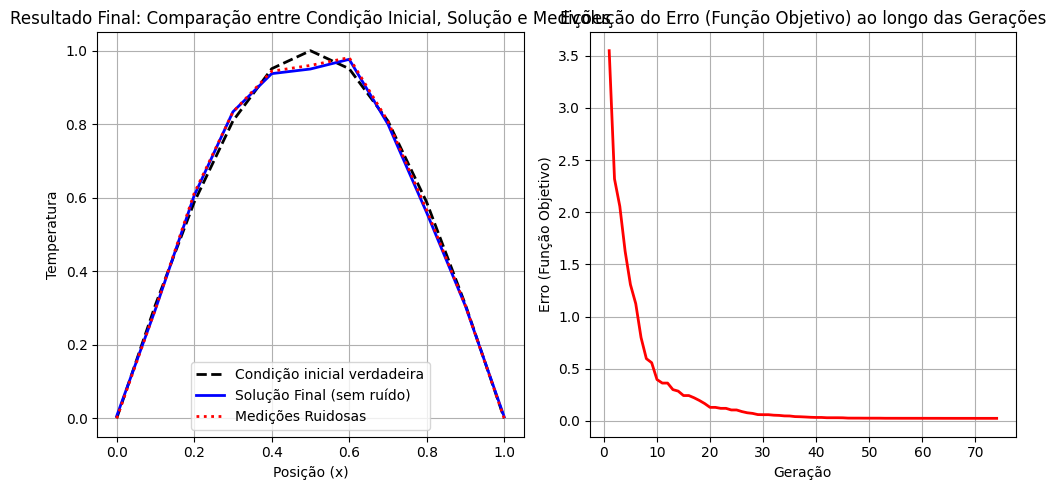

In [130]:
import matplotlib.pyplot as plt

# Visualização dos Resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Dois gráficos (um embaixo do outro)

# Gráfico 1: Melhor solução encontrada vs condição inicial verdadeira vs medições ruidosas
axes[0].plot(x, true_initial_condition, 'k--', label="Condição inicial verdadeira", linewidth=2)  # Condição inicial
axes[0].plot(x, best_solution, label="Solução Final (sem ruído)", color='b', linewidth=2)  # Solução do problema de condução de calor
axes[0].plot(x, T_obs, label="Medições Ruidosas", color='r', linestyle='dotted', linewidth=2)  # Temperaturas com ruído
axes[0].set_title("Resultado Final: Comparação entre Condição Inicial, Solução e Medições")
axes[0].set_xlabel("Posição (x)")
axes[0].set_ylabel("Temperatura")
axes[0].legend()
axes[0].grid()

# Gráfico 2: Evolução do Erro (Função Objetivo) ao longo das Gerações
axes[1].plot(range(1, len(best_solutions) + 1), best_solutions, color='r', linewidth=2)  # Evolução do erro ao longo das gerações
axes[1].set_title("Evolução do Erro (Função Objetivo) ao longo das Gerações")
axes[1].set_xlabel("Geração")
axes[1].set_ylabel("Erro (Função Objetivo)")
axes[1].grid()

# Ajuste final e exibição dos gráficos
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()


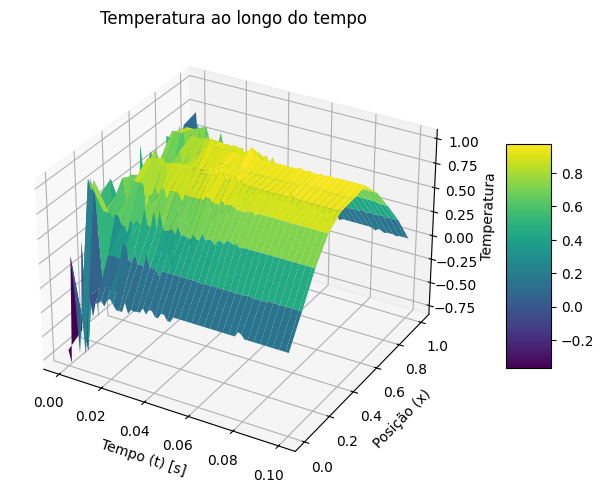

In [131]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Visualização dos Resultados
fig = plt.figure(figsize=(10, 5))

# Adicionar um subplot 3D
ax = fig.add_subplot(111, projection='3d')

# Definir a variável de tempo (já que t = 10^-2 segundos, temos o número de passos de tempo de acordo com sua simulação)
time_steps = len(solutions_over_time)  # Total de passos de tempo
t_values = np.linspace(0, 10e-2, time_steps)  # Assumindo t = 10^-2 segundos como limite

# Criar uma matriz de Z para a evolução das temperaturas
T_values = np.array([solutions_over_time[i] for i in range(time_steps)])

# t (tempo) no eixo Z, x na frente e a temperatura será a cor
T, X = np.meshgrid(t_values, x)

# Plotando a superfície 3D, com t na frente (no eixo Z)
surf = ax.plot_surface(T, X, T_values.T, cmap='viridis', edgecolor='none')

# Adicionando título e rótulos aos eixos
ax.set_title("Temperatura ao longo do tempo")
ax.set_xlabel("Tempo (t) [s]")
ax.set_ylabel("Posição (x)")
ax.set_zlabel("Temperatura")

# Adicionando a barra de cores para indicar os valores de temperatura
fig.colorbar(surf, shrink=0.5, aspect=5)

# Ajuste final para exibição
plt.tight_layout()
plt.show()


In [132]:
# Verificação das condições de contorno
def check_conditions(T_final, dx):
    """
    Verifica se as condições de contorno
    são satisfeitas nas extremidades da barra.
    As condições indicam derivadas nulas nas extremidades (fluxo de calor zero).
    """
    # Calcula as derivadas nas extremidades
    left_derivative = (T_final[1] - T_final[0]) / dx  # Derivada à esquerda (x=0)
    right_derivative = (T_final[-1] - T_final[-2]) / dx  # Derivada à direita (x=Lx)

    # Verifica se as derivadas são zero (aproximadamente, com uma tolerância)
    tolerance = 1e-5
    if abs(left_derivative) < tolerance:
        print(f"Condição de contorno satisfeita na extremidade esquerda (x=0): Derivada = {left_derivative:.5f}")
    else:
        print(f"Derivada na extremidade esquerda (x=0) = {left_derivative:.5f}")

    if abs(right_derivative) < tolerance:
        print(f"Condição de contorno satisfeita na extremidade direita (x=Lx): Derivada = {right_derivative:.5f}")
    else:
        print(f"Derivada na extremidade direita (x=Lx) = {right_derivative:.5f}")

    # Retorna os valores das derivadas para análise adicional
    return left_derivative, right_derivative

# Verificar após a solução do problema direto
left_d, right_d = check_conditions(best_solution, dx)


Derivada na extremidade esquerda (x=0) = 2.90603
Derivada na extremidade direita (x=Lx) = -3.01251
